Проект e-commerce: вариант 1 
Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.

In [1]:
import pandas as pd
import numpy as np
import requests
from urllib.parse import urlencode
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Для начала загрузим все датасеты
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key1 = 'https://disk.yandex.ru/d/p_UjGG_Dv8CE5Q'  # ссылка на датасет

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key1))
response = requests.get(final_url) # запрос ссылки на скачивание
download_url1 = response.json()['href'] #'парсинг' ссылки на скачивание

# Загружаем файл и сохраняем его
download_response = requests.get(download_url1)
orders = pd.read_csv(download_url1, parse_dates=['order_purchase_timestamp']) #изменение формата столбца timestamp в формат даты
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key2 = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig'  # ссылка на датасет

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key2))
response = requests.get(final_url) # запрос ссылки на скачивание
download_url2 = response.json()['href'] #'парсинг' ссылки на скачивание

# Загружаем файл и сохраняем его
download_response = requests.get(download_url2)
customers = pd.read_csv(download_url2)
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key3 = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'  # ссылка на датасет

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key3))
response = requests.get(final_url) # запрос ссылки на скачивание
download_url3 = response.json()['href'] #'парсинг' ссылки на скачивание

# Загружаем файл и сохраняем его
download_response = requests.get(download_url3)

order_items = pd.read_csv(download_url3)
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


#1. Сколько у нас пользователей, которые совершили покупку только один раз?

Какая покупка считается совершенной? Т.е. это та покупка, за которую заплатили/находится в процессе доставки/доставлена. Рассмотрим каждый статус отдельно:

created — создан - пользователь положил в корзину, заказ создан и принят системой, но если он его ещё не оплатил, то данное действие заказом не является, мало ли передумает, отменит, и никто ничего не видел;
approved — подтверждён - т.е. заказ принят, проверен менеджером магазина
invoiced — выставлен счёт - после подтверждениия менеджер выставляет счет. На данном и предыдущем этапах покупка не считается совершенной, покупатель может и отменить;
processing — в процессе сборки заказа. С этого момента покупка считается совершенной, ее оплатили и отправили на сборку;
shipped — отгружен со склада. На данном этапе она тоже уже оплаченная и совершённая;
delivered — доставлен пользователю - здесь покупка прошла свой полный цикл,доведена до своего полного завершенного состояния;
unavailable — недоступен - заказ по какой-то причине недоступен - покупка не совершена;
canceled — отменён - заказ на одном из этапов по какой-то причине отменен, даже если деньги заплачены, их вернули и заказ обнулен. Нет заказа - не было и покупки - покупка не совершена.
Следовательно, за совершенные покупки примем все заказы, которые оплатили, при этом не отменены на каком-либо из этапов, т.е. это заказы со статусами: processing, shipped, delivered.

Нам надо посчитать количество пользователей, которые совершили покупку только один раз, т.е. посчитать количество именно уникальных идентификаторов пользователей, тк у каждого уникального может быть несколько позаказных. 
Для этого необходимо смерджить два датафрейма (customers и orders).

In [5]:
# проверим кол-во строк в каждом дф, для собственного спокойствия, что все совпадает и они одинаковые :)
customers.shape

(99441, 5)

In [6]:
orders.shape

(99441, 8)

In [7]:
# мердж customers и orders
customers_orders = customers.merge(orders)
customers_orders
# получили дф, состоящий из 99441 строк и 12 столбцов (получили 12, т.к.customer_id - общий столбик)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


для т.ч. вычислить кол-во пользователей:
1. запросим из объединенного дф, заказы с необходимыми нам статусами, 
2. сгруппируем по уникальному идентификатору пользователя, 
3. сагрегируем по любому столбику с информацией, принадлежащей каждому id, например customer_city и посчитаем их количество,
4. для того чтобы посчитать сколько id совершили покупку только один раз,запросим сагрегированную информацию = 1, и просуммируем их.

In [8]:
customers_orders.query("order_status in ('processing', 'shipped', 'delivered')")\
    .groupby("customer_unique_id", as_index=False) \
    .agg({'customer_city':'count'}).query("customer_city == 1").customer_city.sum()

91814

#2 Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Доставленными заказами, считаются те, которые прошли все стадии от создания до передачи товара покупателю/пункту выдачи.
Поэтому не совсем понятен вопрос задания, не доставляется в смысле по какой-то тех.причине (например, отменен или недоступен) или не доставляется, тк еще в процессе создания-комплектации-доставки.
Найдем ответ для действительно по факту недоставленных заказов

In [9]:
# Проверим "недоступные" заказы:
no_deliver_unavail = customers_orders.query("order_status == 'unavailable'")

У заказов со статусом 'unavailable'("Недоступен") имеется 'order_purchase_timestamp (время создания заказа)' и 'order_approved_at (время подтверждения оплаты заказа)', а также 'order_estimated_delivery_date(обещанная дата доставки)', следовательно доставка автоматически запланировалась, но отменилась (возможно, отсутствует товар на складе и др.)

In [10]:
# Проверим "отмененные" заказы:
customers_orders.query("order_status == 'canceled'")
# некоторые заказы даже передавались в логистическую службу, но в итоге не были доставлены

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaN,NaN,2018-03-06 00:00:00
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaN,NaN,2017-06-30 00:00:00
409,ffaded93e5a1fce06363cfb6905676a1,587b326ba3bf8aa4d3e50fb1f38ea79f,6722,cotia,SP,5bca61e411c4fcce08327a8efc371911,canceled,2018-06-13 20:52:10,2018-06-13 21:20:38,NaN,NaN,2018-07-11 00:00:00
878,c8223f76047e09bea798462f2f46ffa9,b4ee22e08cdaeab0b8e6bf2e67d7c19b,45690,una,BA,5b4858f2dcf69731f2285a38829bfa7c,canceled,2018-02-15 20:53:17,2018-02-15 21:06:43,2018-02-16 16:52:52,NaN,2018-03-16 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
98551,75c6e03e7206bd1dd59f427c9f75142a,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,81b7c7bbc8ec003eeb67d87441a6a148,canceled,2018-08-20 09:03:23,NaN,NaN,NaN,2018-09-03 00:00:00
98746,ef775ae2f3b831b79dd2e9bcf77bfb06,46c0a00dac020d24bfdfbc8b214d54de,27150,barra do pirai,RJ,1cd8d1567debd198821fe9d46d99b5b1,canceled,2017-09-25 20:16:38,2017-09-25 20:28:20,NaN,NaN,2017-10-20 00:00:00
98786,d9335c099e6943d88ac5f8a7cb418b66,22af178809fa6887af2cc4f7d7bdc0bc,1218,sao paulo,SP,808c7c69c2778bdf4689eee0286e2bef,canceled,2018-02-22 07:57:07,2018-02-22 08:10:27,NaN,NaN,2018-03-13 00:00:00
99007,2034cc6d6d517007a9ba3e22ba643344,cb47d51801e7379766c5cd8ff623f37f,13052,campinas,SP,27d6012b882832dc9ddcf34304eeb77c,canceled,2017-11-11 10:44:49,2017-11-11 10:55:28,NaN,NaN,2017-11-27 00:00:00


In [11]:
customers_orders.query("order_status == 'canceled'").order_delivered_customer_date.unique()
# среди отмененных заказов имеются даже заказы, которые были доставлены до клиента

array([nan, '2016-10-14 15:07:11', '2018-03-21 22:03:51',
       '2016-10-19 18:47:43', '2016-11-08 10:58:34',
       '2016-11-09 14:53:50', '2016-10-16 14:36:59'], dtype=object)

In [12]:
# недоставленные отмененные заказы
no_deliver_cancel = customers_orders[customers_orders['order_delivered_customer_date'].isna()].query("order_status == 'canceled'")

In [13]:
# создала дф с недоставленными заказами
not_delivered = pd.concat([no_deliver_unavail, no_deliver_cancel])
not_delivered

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaN,NaN,2017-03-10 00:00:00
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaN,NaN,2018-06-05 00:00:00
383,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaN,NaN,2018-01-03 00:00:00
556,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaN,NaN,2017-08-11 00:00:00
567,6e067aaac313f893bd40273d8d75027f,f9ac86b4993a6e2a48758cb47d808712,89150,presidente getulio,SC,31f935babbc97f5990e0ffd128e19541,unavailable,2017-11-11 11:25:27,2017-11-11 11:35:31,NaN,NaN,2017-12-08 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
98551,75c6e03e7206bd1dd59f427c9f75142a,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,81b7c7bbc8ec003eeb67d87441a6a148,canceled,2018-08-20 09:03:23,NaN,NaN,NaN,2018-09-03 00:00:00
98746,ef775ae2f3b831b79dd2e9bcf77bfb06,46c0a00dac020d24bfdfbc8b214d54de,27150,barra do pirai,RJ,1cd8d1567debd198821fe9d46d99b5b1,canceled,2017-09-25 20:16:38,2017-09-25 20:28:20,NaN,NaN,2017-10-20 00:00:00
98786,d9335c099e6943d88ac5f8a7cb418b66,22af178809fa6887af2cc4f7d7bdc0bc,1218,sao paulo,SP,808c7c69c2778bdf4689eee0286e2bef,canceled,2018-02-22 07:57:07,2018-02-22 08:10:27,NaN,NaN,2018-03-13 00:00:00
99007,2034cc6d6d517007a9ba3e22ba643344,cb47d51801e7379766c5cd8ff623f37f,13052,campinas,SP,27d6012b882832dc9ddcf34304eeb77c,canceled,2017-11-11 10:44:49,2017-11-11 10:55:28,NaN,NaN,2017-11-27 00:00:00


In [14]:
# чтобы посчитать среднее кол-во недоставленных заказов в месяц, используем столбик с датой создания заказов, тк она точно есть у всех заказов
# выведем у столбика только год и месяц
not_delivered['order_purchase_timestamp'] = not_delivered.order_purchase_timestamp.dt.strftime("%Y-%m")

#посчитаем кол-во недоставленных заказов по каждой причине за каждый месяц, далее среднее значение для каждой причины

Для того чтобы посчитать кол-во заказов в месяц в среднем:
1. сгруппируем по статусу и дате создания заказа, посчитаем кол-во позаказных идентификаторов для подсчета общего кол-ва недоступных и отмененных заказов в каждом месяце;
2. далее снова сгруппируем по статусу и уже посчитаем среднее кол-во заказов каждого статуса в месяц, округлим до целого

In [15]:
not_delivered.groupby(["order_purchase_timestamp", "order_status"], as_index=False).agg({"customer_id": "count"})\
.groupby("order_status").agg({"customer_id": "mean"}).round().reset_index()

,order_status,customer_id
0,canceled,26.0
1,unavailable,29.0


#3 По каждому товару определить, в какой день недели товар чаще всего покупается.

In [16]:
# для решения задачи необходимо смерджить всю информацию о заказах: order_items и orders
orders_info = orders.merge(order_items)
orders_info

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


Как и в первом задании купленным товаром считается товары, за которые заплатили, при этом их приобретение не было отменено, т.е. это заказы со статусами: processing, shipped, delivered.

In [17]:
purchased_products = orders_info.query("order_status in ('processing', 'shipped', 'delivered')")

In [18]:
# и на подобии прошлого задания, выведем из колонки даты создания заказа наименование дня покупки и переименуем этот столбик
purchased_products['order_purchase_timestamp'] = purchased_products.order_purchase_timestamp.dt.day_name()
purchased_products.rename(columns={'order_purchase_timestamp':'name_of_day'}, inplace=True)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
purchased_products.head() #проверяем полученный дф

,order_id,customer_id,order_status,name_of_day,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,Monday,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,Tuesday,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,Wednesday,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,Saturday,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,Tuesday,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Для подсчета частоты покупки каждого товара по дням недели:
1. сгруппируем дф по id товара и наименованию дня недели;
2. посчитаем кол-во заказов через идент-ры заказа, после переименуем в кол-во покупок для удобства восприятия
3. отсортируем по кол-ву покупок для т.ч. вычислить чаще всего покупаемый товар и удалим дубликаты для избежания задваивания в столбике 'product_id'в столбике 'product_id'

In [20]:
purchased_products \
.groupby(["product_id", "name_of_day"], as_index=False) \
.agg({"customer_id": "count"}).rename(columns={'customer_id':'count_purchases'}) \
.sort_values(by="count_purchases", ascending=False) \
.drop_duplicates(subset='product_id')

,product_id,name_of_day,count_purchases
15766,422879e10f46682990de24d770e7f83d,Wednesday,93
36178,99a4788cb24856965c36a24e339b6058,Monday,92
40679,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19944,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13422,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
23811,6435be64ad92f52631170f9a92718a99,Sunday,1
23813,64367bed3ed96fd9381676fbe33b6443,Sunday,1
23814,643a4049ae3e6df63858575f28cd7b21,Friday,1
23816,643a66b1dc5dad3de6cb5a41549e72f1,Sunday,1


#4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [21]:
# для решения задачи необходимо смерджить все датасеты
customers_orders_info = customers_orders.merge(order_items)
customers_orders_info

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [22]:
# Посчитаем сколько всего покупок совершал каждый юзер
purchases = customers_orders_info.groupby(["customer_unique_id", "order_purchase_timestamp"], as_index=False)\
.agg({"customer_city":"count"}).rename(columns={'customer_city':'count_purchases'})\
.drop_duplicates(subset='customer_unique_id')
purchases

,customer_unique_id,order_purchase_timestamp,count_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1
...,...,...,...
98376,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2
98377,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1
98378,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1
98379,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1


In [23]:
purchases.query('count_purchases > 1').shape [0]
# ради интереса посчитала сколько пользователей приобретали товары в данном магазине

9600

всего 9600 пользователей из 95420 за все время приобретали товар > 1 раза?!

вопрос: имеет ли смысл считать дальше среднее кол-во в неделю по месяцам? 
Ответ: не особо, но раз надо, то посчитаем

In [24]:
# добавим столбик со средним количеством покупок в неделю в месяц покупки
purchases['purchases_per_week']=(purchases.count_purchases / (purchases.order_purchase_timestamp.dt.days_in_month / 7))
purchases

,customer_unique_id,order_purchase_timestamp,count_purchases,purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,0.233333
...,...,...,...,...
98376,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2,0.466667
98377,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,0.225806
98378,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,0.250000
98379,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,0.225806


In [25]:
# преобразуем столбик создания заказа в формат "год-месяц" для дальнейшей обработки дф
purchases['order_purchase_timestamp'] = purchases.order_purchase_timestamp.dt.strftime("%Y-%m")
purchases

,customer_unique_id,order_purchase_timestamp,count_purchases,purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,0.233333
...,...,...,...,...
98376,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2,0.466667
98377,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,0.225806
98378,ffff371b4d645b6ecea244b27531430a,2017-02,1,0.250000
98379,ffff5962728ec6157033ef9805bacc48,2018-05,1,0.225806


In [26]:
# преобразуем дф, где строки - id пользователей, столбцы - дата покупки(год-месяц), значения - среднее кол-во покупок в неделю
purchases.rename(columns ={'order_purchase_timestamp':'date'})\
.pivot(index = 'customer_unique_id', columns = 'date', values = 'purchases_per_week').reset_index()

date,customer_unique_id,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN
2,0000f46a3911fa3c0805444483337064,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0004aac84e0df4da2b147fca70cf8255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.233333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.466667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95416,fffea47cd6d3cc0a88bd621562a9d061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.225806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95417,ffff371b4d645b6ecea244b27531430a,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95418,ffff5962728ec6157033ef9805bacc48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN


Получили значения сколько в среднем в неделю(именно месяца заказа) клиент делал покупок.

По заданию не совсем понятно какое среднее надо считать(среднее за неделю в месяц, в который приобретался товар или среднее за каждую неделю всего периода,который представлен в датафрейме (24 месяца).
Но если рассчитывать на весь период, то это выйдет совсем мизерная цифра, которая в анализе данных не будет иметь особого значения, поэтому думаю делать такой дф не имеет смысла. Для этого будет достаточно рассчитанное среднее количество разделить на 24 и распределить полученное значение по всем 24 месяцам.Например, для пользователя fffcf5a5ff07b0908bd4e2dbc735a684, среднее кол-во покупок за весь период = 0.466667/24=0.01944, т.е. он за весь период совершил 0,02 покупки. 

Вывод: магазину надо очень сильно призадуматься, почему пользователи, так мало у него приобретают, а этого ведь еще не самый низкий показатель, как мы видим из датафрейма(даже в разрезе среднего за неделю в месяц покупки), либо это очень специфичный товар, частое приобретение которого не требуется.

In [27]:
round(0.466667/24, 5)

0.01944

#5.  Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

Retention показывает, какой процент новых пользователей вернулись в продукт в конкретный день с момента прихода.
ретеншен рассчитывается по месячным когортам и месячным интервалам

In [28]:
df = customers_orders_info.query("order_status in ('processing', 'shipped', 'delivered')")
# отфильтруем только совершенные заказы

In [29]:
#тк нет даты регистрации, примем за дату первого упоминания - дату создания покупки, и вместе датой оплаты заказа, переведем в нужный формат
df['order_purchase_timestamp'] = pd.to_datetime(df.order_purchase_timestamp, format='%Y-%m-%d')
df['order_approved_at'] = pd.to_datetime(df.order_approved_at, format='%Y-%m-%d')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
df['reg_month'] = df['order_purchase_timestamp'].astype('datetime64[M]')
# для удобства работы приводим дату к первой дате месяца и создаем новый столбик
df['transaction_month'] = df['order_approved_at'].astype('datetime64[M]')
# тоже самое делаем с датой оплаты

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
customer= df.groupby(['customer_unique_id'])['reg_month'].min().reset_index()
customer
# минимальная дата регистрации

,customer_unique_id,reg_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01
...,...,...
94680,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01
94681,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01
94682,ffff371b4d645b6ecea244b27531430a,2017-02-01
94683,ffff5962728ec6157033ef9805bacc48,2018-05-01


In [32]:
min_date = df['transaction_month'].min() #первая дата покупки
max_date = df['transaction_month'].max() #последняя дата покупки
month = pd.DataFrame(pd.date_range(min_date, max_date, freq='MS'))
# генерируем диапазон дат для дальнейшего заполнения
month.columns=['month'] #переименовали столбик

In [33]:
#вспомогательные столбцы для cross джойна
customer['key']=1
month['key']=1 

In [34]:
template = customer.merge(month, on='key')[['customer_unique_id', 'reg_month', 'month']]
# мерджим дф с айди покупателей, месяцем регистрации и покупки

In [35]:
template = template[template['month']>=template['reg_month']]
# оставляем только те месяцы, когда юзер уже был зарегистрирован
template

,customer_unique_id,reg_month,month
20,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01
21,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01
22,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01
23,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01
24,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01
...,...,...,...
2367120,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-05-01
2367121,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-06-01
2367122,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-07-01
2367123,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-08-01


In [36]:
trans_month= df.groupby(['customer_unique_id', 'transaction_month'])['price'].sum().reset_index()
# агрегация по юзеру и по месяцу - транзакции помесячно

In [37]:
customers_orders_info.groupby(['customer_unique_id','order_id']).order_item_id.value_counts().unique()
# подсчет кол-ва товаров в каждом заказе.

array([1])

In [38]:
#тк в каждом заказе по одному товару, за потраченную сумму берем просто прайс
trans_month.columns=['customer_unique_id', 'month', 'price'] #название колонок
trans_month

,customer_unique_id,month,price
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-01,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,180.00
...,...,...,...
96535,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1570.00
96536,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,64.89
96537,ffff371b4d645b6ecea244b27531430a,2017-02-01,89.90
96538,ffff5962728ec6157033ef9805bacc48,2018-05-01,115.00


In [39]:
report=template.merge(trans_month, on = ['customer_unique_id', 'month'], how='left')
report['active']=(report['price']>0)*1 #активность пользователя, если юзер покупал в данном месяце, то 1, если нет - 0
report

,customer_unique_id,reg_month,month,price,active
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01,129.9,1
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01,NaN,0
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01,NaN,0
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01,NaN,0
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01,NaN,0
...,...,...,...,...,...
897103,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-05-01,NaN,0
897104,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-06-01,NaN,0
897105,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-07-01,NaN,0
897106,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-08-01,NaN,0


In [40]:
report["lifetime"] = ((report['month']-report["reg_month"])/np.timedelta64(1, 'M')).round().astype(int)
# разница между датой покупки и регистрации в месяцах
report

,customer_unique_id,reg_month,month,price,active,lifetime
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01,129.9,1,0
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-06-01,NaN,0,1
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-07-01,NaN,0,2
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01,NaN,0,3
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-09-01,NaN,0,4
...,...,...,...,...,...,...
897103,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-05-01,NaN,0,12
897104,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-06-01,NaN,0,13
897105,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-07-01,NaN,0,14
897106,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2018-08-01,NaN,0,15


In [41]:
# ретеншн за весь период
retention = report.pivot_table(index='reg_month', columns='lifetime', values='active', aggfunc='mean') #процент активных пользователей
retention

lifetime,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
reg_month,,,,,,,,,,,,,,,,,,,,,
2016-09-01,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
2016-10-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003690,0.000000,0.000000,0.003690,...,0.003690,0.000000,0.003690,0.0,0.007380,0.00738,0.0,0.0,0.0,NaN
2016-12-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN
2017-01-01,0.952703,0.050000,0.002703,0.001351,0.004054,0.001351,0.004054,0.001351,0.001351,0.000000,...,0.001351,0.002703,0.004054,0.0,0.001351,0.00000,NaN,NaN,NaN,NaN
2017-02-01,0.970203,0.024434,0.002980,0.001788,0.004172,0.001192,0.002384,0.001788,0.001192,0.001788,...,0.000596,0.000596,0.002384,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2017-03-01,0.989097,0.015966,0.003505,0.003894,0.003505,0.001558,0.001558,0.003115,0.003115,0.001168,...,0.002336,0.000779,0.001558,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,0.977056,0.029004,0.002165,0.001732,0.003030,0.002597,0.003463,0.002597,0.003463,0.001732,...,0.000866,0.001299,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,0.985532,0.019574,0.004823,0.003688,0.003121,0.003404,0.004255,0.001418,0.002553,0.002270,...,0.002270,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,0.986102,0.018423,0.003555,0.003878,0.002586,0.003555,0.003555,0.002262,0.001293,0.002262,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# ретеншн за 2017 год
retention = retention.query("'2017-01' <= reg_month <= '2017-12'")
retention

lifetime,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
reg_month,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.952703,0.050000,0.002703,0.001351,0.004054,0.001351,0.004054,0.001351,0.001351,0.000000,...,0.001351,0.002703,0.004054,0.0,0.001351,0.0,NaN,NaN,NaN,NaN
2017-02-01,0.970203,0.024434,0.002980,0.001788,0.004172,0.001192,0.002384,0.001788,0.001192,0.001788,...,0.000596,0.000596,0.002384,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2017-03-01,0.989097,0.015966,0.003505,0.003894,0.003505,0.001558,0.001558,0.003115,0.003115,0.001168,...,0.002336,0.000779,0.001558,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,0.977056,0.029004,0.002165,0.001732,0.003030,0.002597,0.003463,0.002597,0.003463,0.001732,...,0.000866,0.001299,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,0.985532,0.019574,0.004823,0.003688,0.003121,0.003404,0.004255,0.001418,0.002553,0.002270,...,0.002270,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,0.986102,0.018423,0.003555,0.003878,0.002586,0.003555,0.003555,0.002262,0.001293,0.002262,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-01,0.976933,0.028309,0.003408,0.002097,0.003145,0.002097,0.003145,0.001048,0.001835,0.002621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,0.984436,0.022130,0.003648,0.002675,0.003648,0.005350,0.002918,0.002675,0.000973,0.001946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,0.989655,0.016749,0.005172,0.003448,0.004187,0.002463,0.002217,0.002463,0.002956,0.001724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


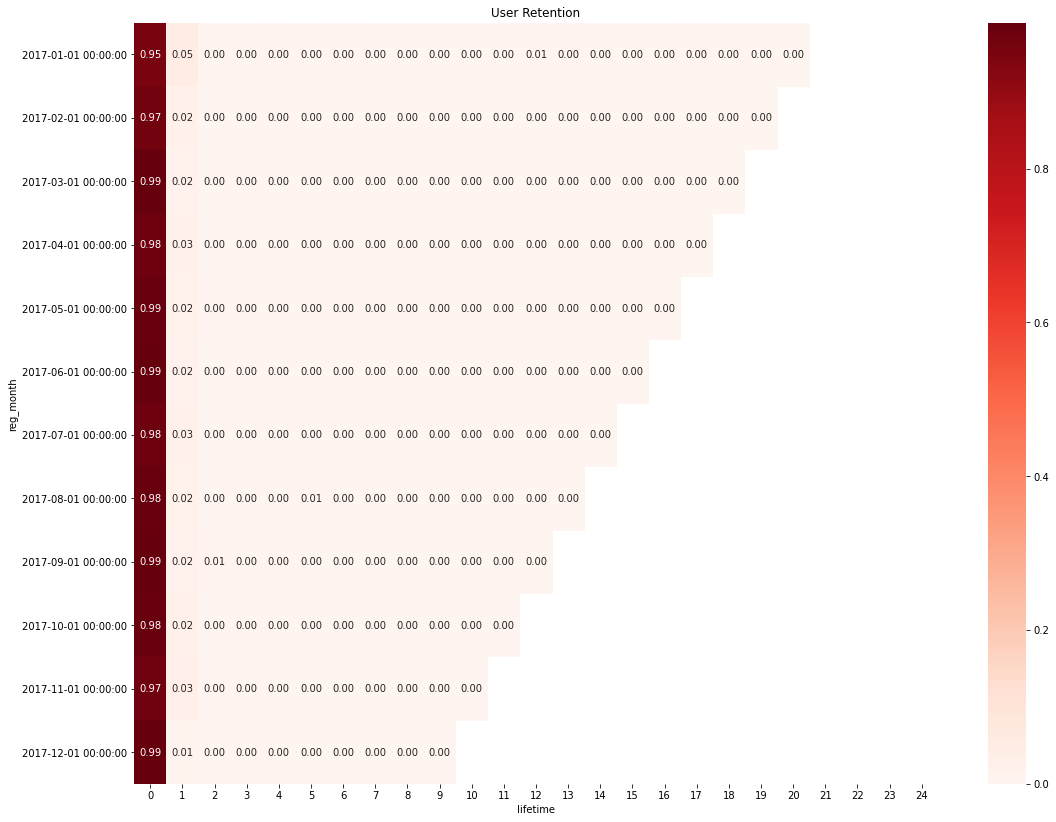

In [43]:
plt.figure(figsize=(18,14))
plt.title('User Retention')
ax = sns.heatmap(data=retention, annot=True, fmt=".2f", cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
plt.show()

In [44]:
retention.loc['2017-01':'2017-12', 2].idxmax()
# когорта с самым высоким retention на 3й месяц в период с января по декабрь 2017
# первая покупка этой когортой была совершена 2017-09 и далее в течение 3 месяцев подряд было максимальное значение покупок)

Timestamp('2017-09-01 00:00:00')

#6 Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

RFM-моделирование — это метод маркетингового анализа, используемый для оценки ценности клиента.
основано на трех факторах:
1. Давность (recency): Как недавно клиент совершил покупку
2. Частота(frequency): Как часто клиент совершает покупку
3. Денежная стоимость(monetary): Сколько денег клиент тратит на покупки 

In [45]:
df = customers_orders_info.query("order_status in ('processing', 'shipped', 'delivered')")
# возьмем дф с совершенными покупками

In [46]:
df_ = df[['customer_unique_id','order_id','order_purchase_timestamp','price']]
# оставляем только нужные колонки
# до этого мы выясняли что в каждом заказе по одному товару, следовательно вся прибыль от клиента указана в колонке 'price'.

In [47]:
df_.order_purchase_timestamp = pd.to_datetime(df_.order_purchase_timestamp, format='%Y-%m-%d')
# перевели столбик в нужный формат

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
# Давность
df_recency = df_.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max() #создали дф давности покупки
df_recency.rename(columns={'order_purchase_timestamp':'last_purchase_date'}, inplace=True)
recent_date = df_recency['last_purchase_date'].max()
df_recency['recency'] = df_recency['last_purchase_date'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,customer_unique_id,last_purchase_date,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [49]:
# Частота
df_frequency = df_.drop_duplicates().groupby(by=['customer_unique_id'], as_index=False)['order_purchase_timestamp'].count()
df_frequency.rename(columns={'order_purchase_timestamp':'frequency'}, inplace=True)
df_frequency.head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [50]:
# Денежная стоимость
df_monetary = df_.groupby(by='customer_unique_id', as_index=False)['price'].sum()
df_monetary.rename(columns={'price':'monetary'}, inplace=True)
df_monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [51]:
# мерджим дф со всеми тремя факторами
rf = df_recency.merge(df_frequency, on='customer_unique_id')
rfm = rf.merge(df_monetary, on='customer_unique_id').drop(columns='last_purchase_date')
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


In [52]:
# Ранжирование клиентов на основе их недавности, частоты и денежной стоимости
rfm['R_rank'] = rfm['recency'].rank(ascending=False)
rfm['F_rank'] = rfm['frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['monetary'].rank(ascending=True)
 
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100
 
rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm.head()

,customer_unique_id,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,76.186302,47.369171,47.369171
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,75.155516,47.369171,47.369171
2,0000f46a3911fa3c0805444483337064,541,1,69.00,3.539631,47.369171,47.369171
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,28.723663,47.369171,47.369171
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,33.732376,47.369171,47.369171


In [53]:
# Вычисление оценки RFM
# Оценка RFM рассчитывается на основе ранжирования недавности, частоты, денежной стоимости
# Формула: Сводный балл = 0,15*R + 0,28*F + 0,57*M

rfm['RFM_Score'] = 0.15*rfm['R_rank_norm']+0.28 * rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)
rfm[['customer_unique_id', 'RFM_Score']].head()

,customer_unique_id,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,2.58
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2.58
2,0000f46a3911fa3c0805444483337064,2.04
3,0000f6ccb0745a6a4b88665a16c9f078,2.23
4,0004aac84e0df4da2b147fca70cf8255,2.27


Ценность каждого клиента определим по 5-балльной шкале

Рейтинг Клиента на основе оценки RFM:

RFM_Score > 4,5     - Лучший клиент

4.5 > RFM_Score > 4 - Ценный клиент

4 > RFM_Score > 3   - Клиент средней ценности

3 > RFM_Score > 1.6 - Малоценный клиент

RFM_Score < 1,6     - Потерянный клиент

In [54]:
rfm["Customer_segment"] = np.where(rfm['RFM_Score'] > 4.5, "Лучший клиент",
(np.where(rfm['RFM_Score'] > 4, "Ценный клиент",
(np.where(rfm['RFM_Score'] > 3, "Клиент средней ценности",
np.where(rfm['RFM_Score'] > 1.6,'Малоценный клиент', 
         'Потерянный клиент'))))))
rfm[['customer_unique_id', 'RFM_Score', 'Customer_segment']].head(20)

,customer_unique_id,RFM_Score,Customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2.58,Малоценный клиент
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2.58,Малоценный клиент
2,0000f46a3911fa3c0805444483337064,2.04,Малоценный клиент
3,0000f6ccb0745a6a4b88665a16c9f078,2.23,Малоценный клиент
4,0004aac84e0df4da2b147fca70cf8255,2.27,Малоценный клиент
5,0004bd2a26a76fe21f786e4fbd80607f,2.52,Малоценный клиент
6,00050ab1314c0e55a6ca13cf7181fecf,2.55,Малоценный клиент
7,00053a61a98854899e70ed204dd4bafe,2.45,Малоценный клиент
8,0005e1862207bf6ccc02e4228effd9a0,2.04,Малоценный клиент
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.48,Малоценный клиент


In [55]:
# кол-во клиентов, совершивших покупку
rfm.customer_unique_id.shape[0] 

94685

In [56]:
percent = rfm.Customer_segment.value_counts().to_frame()
percent['percent'] = round((rfm['Customer_segment'].value_counts() * 100) / rfm['customer_unique_id'].shape[0],2)
percent
#из 94685 клиентов, основную долю составляют малоценные клиенты 94,74%

,Customer_segment,percent
Малоценный клиент,89702,94.74
Лучший клиент,2684,2.83
Ценный клиент,2299,2.43


###2 способ расчета RFM

In [57]:
df = customers_orders_info.query("order_status in ('processing', 'shipped', 'delivered')")
# возьмем дф с совершенными покупками

In [58]:
df2 = df[['customer_unique_id','order_id','order_purchase_timestamp','price']]
# оставляем только нужные колонки

In [59]:
# находим последнюю дату покупки и рассчитываем recency/frequency/monetary
last_date = df2['order_purchase_timestamp'].max()
df2 = df2.reset_index().groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: (last_date - x.max()).days,
                                                 'order_id': lambda x: len(x), 
                                                 'price': lambda x: x.sum()})
df2.rename(columns={'order_purchase_timestamp': 'recency', 
                          'order_id': 'frequency', 
                          'price': 'monetary_value'}, inplace=True)

In [60]:
df2.describe()

,recency,frequency,monetary_value
count,94685.000000,94685.000000,94685.000000
mean,242.240756,1.180113,141.866872
std,152.828251,0.620186,215.713612
min,0.000000,1.000000,0.850000
25%,118.000000,1.000000,47.800000
50%,223.000000,1.000000,89.800000
75%,351.000000,1.000000,154.910000
max,728.000000,24.000000,13440.000000


In [61]:
# разделим всех клиентов на 3 равных части (по ~33% )
# 33-й и 66-й процентили количества дней от последней покупки:
quantiles = df2.quantile(q=[0.33, 0.66])
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.33: 152.0, 0.66: 290.0},
 'frequency': {0.33: 1.0, 0.66: 1.0},
 'monetary_value': {0.33: 57.99, 0.66: 124.99}}

In [62]:
# делим на группы (1,2,3)
segmented_rfm = df2

def RScore(x,p,d):
    if x <= d[p][0.33]:
         return 1
    elif x <= d[p][0.66]:
         return 2
    else:
         return 3

segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(RScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(RScore, args=('monetary_value',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.reset_index()

,customer_unique_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,1,1,3,113
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,1,1,1,111
2,0000f46a3911fa3c0805444483337064,541,1,69.00,3,1,2,312
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,3,1,1,311
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,3,1,3,313
...,...,...,...,...,...,...,...,...
94680,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,1570.00,3,3,3,333
94681,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,2,1,2,212
94682,ffff371b4d645b6ecea244b27531430a,572,1,89.90,3,1,2,312
94683,ffff5962728ec6157033ef9805bacc48,123,1,115.00,1,1,2,112


In [63]:
percent = segmented_rfm.groupby('RFMScore').recency.count().reset_index().rename(columns={'recency': 'count_of_orders'})
percent['percent,%'] = round((percent['count_of_orders'] * 100) /percent['count_of_orders'].sum(),2)
percent
# нашли в процентном соотношении каждую группу от общего кол-ва клиентов, совершивших покупки

,RFMScore,count_of_orders,"percent,%"
0,111,9749,10.30
1,112,9274,9.79
2,113,8466,8.94
3,131,478,0.50
4,132,1171,1.24
5,133,2335,2.47
6,211,9998,10.56
7,212,8795,9.29
8,213,8361,8.83
9,231,455,0.48


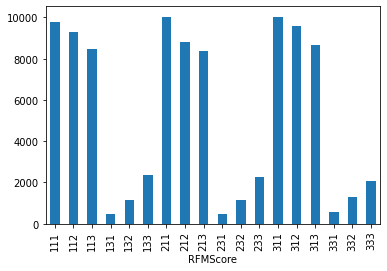

In [64]:
percent.plot(x='RFMScore', y='count_of_orders', kind='bar',legend=False)
# интересный конечно график получился, почти симметричный :)

R1—F1—M(1-3) — потерянные. Скорее всего, эти клиенты уже ушли от нас, и не стоит тратить слишком больших усилий на этот сегмент. Отправляем автоматическую цепочку реактивации.

R1—F(2-3)—M(1-3) — лояльные клиенты, потерявшие активность.Эти клиенты сделали у нас несколько покупок, а потом перестали покупать. Отправляем им реактивационные письма, запрашиваем обратную связь, предлагаем бонусы, программы лояльности.

R2-F(1-2)-M(1-3) — спящие.Эти клиенты ещё помнят о нас. Нужно попробовать расшевелить их стимулирующими акциями. Отправляем им рассылки с интересными акциями и выгодными предложениями.

R2-F(3)-M(1-3) — лояльные спящие клиенты.Ещё не так давно они часто покупали у вас, а сейчас перестали. Также Отправляем им рассылки с интересными акциями и выгодными предложениями.

R3—F1—M(1-3) — новички.	Отправляем welcome-цепочку с описанием преимуществ, ответами на частые вопросы, обучающие материалы

R3—F2—M(1-3) — развивающиеся. Нужно попытаться увеличить средний чек допродажей. Отправляем им рассылки с сопутствующими товарами

R3—F3—M(1-3) — постоянные.Отправялем им особые предложения, например, участие в программе лояльности — приглашение в клуб любимых клиентов

Пользователи «111» покупали давно, один раз и на маленькую сумму, они составляют 10,3% (не самая малочисленная группа относительно других). Постоянных клиентов очень мало.

Спасибо за внимание! :)